In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
qems = np.load("QEMS_total_sell.npy")
baseline1 = np.load("baseline1_total_sell.npy")
baseline2 = np.load("baseline2_total_sell.npy")

In [4]:
rewards = np.vstack((qems, baseline1, baseline2))

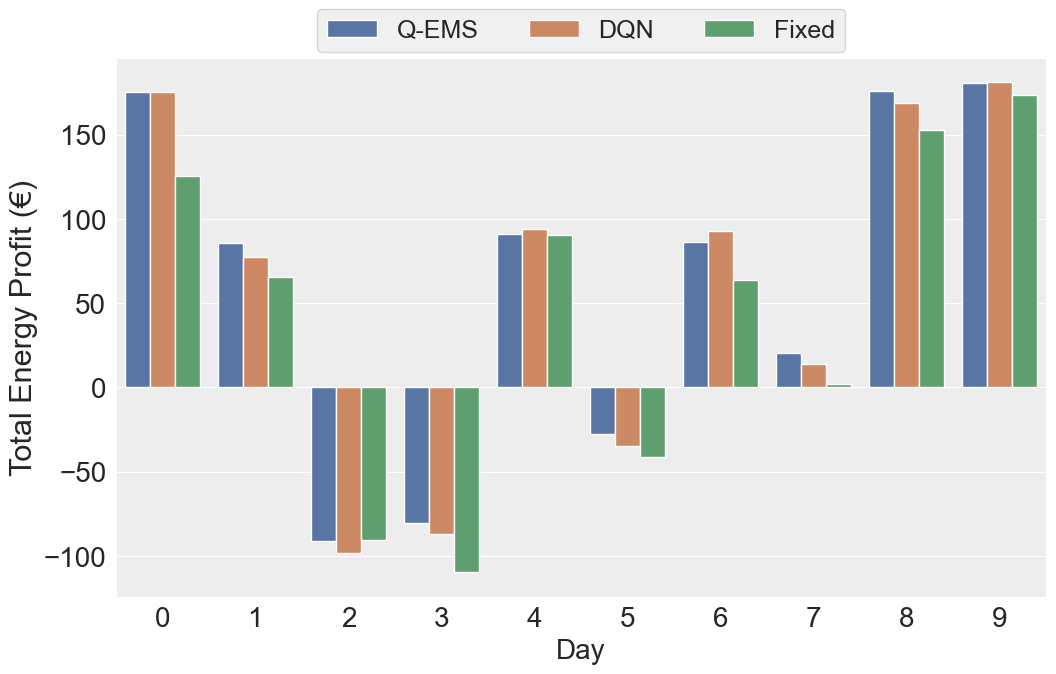

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Day = list(range(len(qems)))
methods = ['Q-EMS', 'DQN', 'Fixed']

# Updating the DataFrame creation with the corrected Day list
data = {
    'Method': [m for m in methods for _ in Day],
    'Day': Day * len(methods),
    'Rewards': [reward for reward_list in rewards for reward in reward_list],
}

reward_df = pd.DataFrame(data)

# Plotting
sns.set_style("darkgrid", {"axes.facecolor": ".93"})
#sns.set_style("darkgrid")
#sns.set()
plt.figure(figsize=(12, 7))
palette = ['#11b0b4', '#6ec6af', '#e8e8e8']
sns.barplot(x='Day', y='Rewards', hue='Method', data=reward_df, palette='deep')
plt.ylabel("Total Energy Profit (€)", fontsize=22)
plt.xlabel("Day", fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(0.5, 1.05), ncol=6, fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.savefig("profit.pdf", dpi=1500, bbox_inches = 'tight',format="pdf")

plt.show()